In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import find_peaks

# MNS CP 7 
#### Quinten de Block & Gonzalo Cardenal

### A) Numerical simulation Hodgkin-Huxley Model

In [2]:
#defining alphas and betas
def alphan(V):
    return 0.01*(V+55)/(1-np.exp(-0.1*(V+55)))

def alpham(V):
    return 0.1*(V+40)/(1-np.exp(-0.1*(V+40)))

def alphah(V):
    return 0.07*np.exp(-0.05*(V+65))

def betan(V):
    return 0.125*np.exp(-0.0125*(V+65))

def betam(V):
    return 4*np.exp(-0.0556*(V+65))

def betah(V):
    return 1/(1+np.exp(-0.1*(V+35)))


In [3]:
#defining currents Na, K, leak, Ie
def Ina(gna, m, h, V, Ena):
    return gna*m**3*h*(V-Ena)

def Ik(gk, n, V, Ek):
    return gk*n**4*(V-Ek)

def Ileak(gleak, V, Eleak):
    return gleak*(V-Eleak)

In [4]:
#defining d/dt
def dxm(V,x):
    return alpham(V)*(1-x) - betam(V)*x

def dxh(V,x):
    return alphah(V)*(1-x) - betah(V)*x

def dxn(V,x):
    return alphan(V)*(1-x) - betan(V)*x

def dV(M, H, N, V):
    return (-gna*M**3*H*(V-Ena) - gk*N**4*(V-Ek) - gleak*(V-Eleak) + Ie)/Cm


In [5]:
#general euler method of defining ODE
def euler(x_0,t):
    M = np.zeros(len(t))
    M[0] = x_0[0]
    H = np.zeros(len(t))
    H[0] = x_0[1]
    N = np.zeros(len(t))
    N[0] = x_0[2]
    V = np.zeros(len(t))
    V[0] = x_0[3]
    for i in range(0,len(t)-1):
        M[i+1]=M[i]+dxm(V[i], M[i])*dt
        H[i+1]=H[i]+dxh(V[i], H[i])*dt
        N[i+1]=N[i]+dxn(V[i], N[i])*dt
        V[i+1]=V[i]+dV(M[i+1],H[i+1],N[i+1],V[i])*dt
    return M, H, N, V

In [6]:
#defining some fixed numbers
Ena = 50
Ek = -77
Eleak = -54.387
gna = 120
gk = 36
gleak = 0.3

Ie = 0
Cm = 1

In [7]:
#defining initial values
m_0 = 0.0529
h_0 = 0.5961
n_0 = 0.3177
V_0 = -65

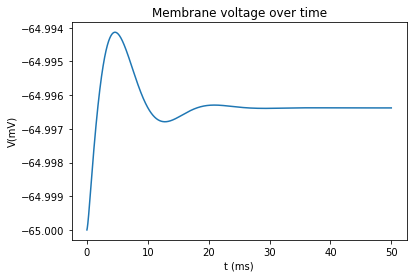

In [8]:
t_max = 50
dt = 0.01
t = np.arange(0,t_max,dt)
x0 = [m_0, h_0, n_0, V_0]
plt.title("Membrane voltage over time")
plt.xlabel("t (ms)")
plt.ylabel('V(mV)')
M, N, H, V = euler(x0,t)
plt.plot(t,V)
ax = plt.gca()
ax.ticklabel_format(useOffset=False)

### B) Constant External Current

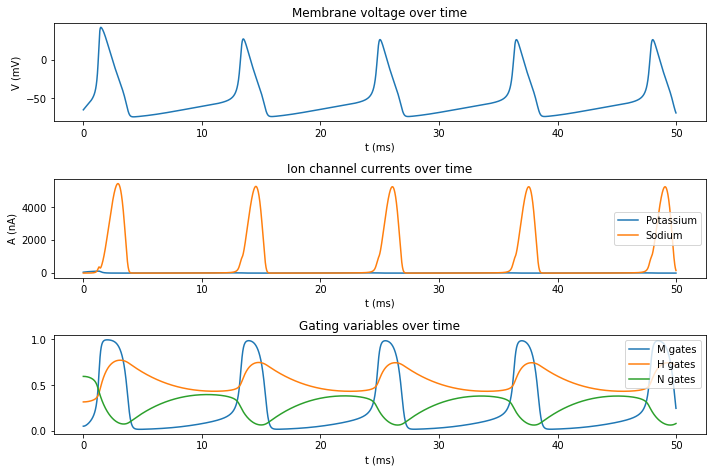

In [9]:
Ie = 20
Mb, Nb, Hb, Vb = euler(x0,t)
Ikb = Ik(gk, Nb, Vb, Ek)
Inab = Ina(gna, Mb, Hb, Vb, Ena)
fig, axs = plt.subplots(3,1, figsize = (10,6.66))
plt.setp(axs[:], xlabel='t (ms)')
axs[0].plot(t, Vb)
axs[0].set_title("Membrane voltage over time")
axs[0].set_ylabel("V (mV)")
axs[1].plot(t,Ikb,label='Potassium')
axs[1].plot(t,-Inab, label='Sodium')
axs[1].set_title("Ion channel currents over time")
axs[1].set_ylabel("A (nA)")
axs[1].legend()
axs[2].set_title("Gating variables over time")
axs[2].plot(t,Mb, label='M gates')
axs[2].plot(t,Hb, label='H gates')
axs[2].plot(t,Nb, label='N gates')
axs[2].legend()
fig.tight_layout()

#### Discussion

Observing the plots, it can be seen that M-gates get activated really fast meanwhile the number of H-gates gets the steepest increase. That leads to the fast activation of sodium currents which follow the shape of a narrow gaussian curve.

Focusing in potassium channels, the N-gates activate and deactivate more smoothly but the current of this channels is 0 even for big values of n-gates.

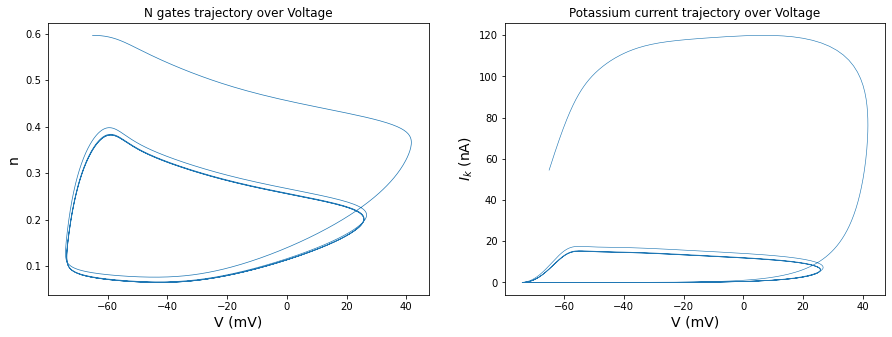

In [10]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

axs[0].plot(Vb, Nb, linewidth=0.7)
axs[0].set_xlabel('V (mV)',fontsize=14)
axs[0].set_ylabel('n',fontsize=14);
axs[0].set_title('N gates trajectory over Voltage')

axs[1].plot(Vb,Ikb,linewidth=0.6)
axs[1].set_ylabel(r'$I_{k}$'+' (nA)',fontsize=14)
axs[1].set_xlabel('V (mV)',fontsize=14);
axs[1].set_title('Potassium current trajectory over Voltage');

#### Result interpretation

We can see trajectories are recirculating. The system stabilizes and produces a periodic action potential entering in a limit cycle. The line that is not overlap represents the initialization stage until it enters in the limit cycle of APs.

### C) Firing rate as a function of $I_e$

In [11]:
Iec= np.linspace(0,20.01,100) #mA

t_max = 100
dt = 0.01
t = np.arange(0,t_max,dt)

firing_rate_c = np.zeros(len(Iec))

for i in range(0,len(Iec)):
    
    Ie = Iec[i]*np.ones(len(t)
    
    Mc, Nc, Hc, Vc = euler(x0,t)
    
    peaks, prop= find_peaks(Vc, height=-0.005)
    
    if len(peaks)>3:
        firing_rate_isi_mean = np.zeros(len(peaks)-1)
        
        for p in range (0, len(peaks)-1):
            firing_rate_isi_mean[p]= (peaks[p+1]-peaks[p])*dt
        
        firing_rate_c[p]= round(1/np.mean(firing_rate_isi_mean),4)*1000 #for transform ms into s

plt.plot(Iec, firing_rate_c)
plt.title('Firing rate over external current')
plt.xlabel('$I_e$')
plt.ylabel('Firing rate(Hz)');

SyntaxError: invalid syntax (<ipython-input-11-7886e8253580>, line 13)